<center>

# **Informe Técnico: Optimización de Inversión en Google Ads Search – Skechers**
</center>

<style>
    .justificado {
        text-align: justify;
        font-size: 15px;
        line-height: 1.8;
    }
</style>

<div class="justificado">

**Objetivo:** Evaluar el desempeño histórico de las campañas Search de Google Ads de Skechers, y generar una recomendación de inversión para febrero de 2025, utilizando modelos de machine learning y análisis de series temporales.

**Fecha de análisis:** Mayo 2025  
**Autor:** Andres Felipe Jimenez Hernandez

</div>

---

## **1. Introducción**

<style>
    .justificado {
        text-align: justify;
        font-size: 15px;
        line-height: 1.8;
    }
</style>

<div class="justificado">

El presente análisis busca optimizar la inversión en campañas de Google Ads Search de la marca Skechers. Para ello, se dispone de una base de datos que contiene el comportamiento operativo diario desde julio de 2021 hasta febrero de 2025, incluyendo métricas clave como costo, impresiones, clics, CTR, CPC y conversiones.

Se aplicaron técnicas de análisis predictivo para proyectar el valor de conversiones esperado en febrero de 2025 y calcular el ROAS estimado, apoyando así la toma de decisiones estratégicas en medios digitales.

</div>

---

<style>
    .justificado {
        text-align: justify;
        font-size: 15px;
        line-height: 1.8;
    }
</style>

# **2. Variables seleccionadas**

<div class="justificado">

Se seleccionaron variables predictoras relevantes tanto desde la perspectiva operativa como económica:

<div style="text-align: center; font-size: 15px; line-height: 1.8;">
<strong> costo:</strong> inversión publicitaria.<br>
<strong> clics</strong> e <strong>impresiones:</strong> interacción y alcance.<br>
<strong> ctr_calc</strong> (tasa de clics): mide la eficiencia del anuncio.<br>
<strong> cpc_calc</strong> (costo por clic): impacto económico por clic.<br>
<strong> es_evento:</strong> refleja la influencia de eventos promocionales.<br>
</div>

La variable objetivo fue:
- **roas**: retorno sobre la inversión publicitaria.

</div>

### **Justificacion de la Selección de las Variables para la Optimización Publicitaria**  

<div class="justificado">

La selección de variables clave responde a la necesidad de capturar ***dimensiones críticas*** del desempeño publicitario en Google Ads, integrando factores **operativos** y **económicos** con el objetivo de optimizar la estrategia de inversión.
</div>

### **Variables Seleccionadas**  

<div class="justificado">

✔ **Costo (inversión publicitaria):** Evalúa la eficiencia del gasto en publicidad y su relación con la conversión de usuarios. Actúa como un **insumo directo** en la determinación del retorno sobre inversión (**ROAS**).  

✔ **Clics e impresiones (interacción y alcance):** Reflejan el nivel de visibilidad de los anuncios y la respuesta de los usuarios ante ellos. La relación entre estas variables permite analizar la **efectividad de la campaña** en términos de engagement.  

✔ **ctr_calc (tasa de clics):** Indicador crítico de rendimiento que mide la capacidad de los anuncios para atraer interacción. Valores bajos pueden sugerir **ajustes en segmentación o creatividad**, mientras que valores elevados indican **alta relevancia** para el público objetivo.  

✔ **cpc_calc (costo por clic):** Variable determinante en la optimización del presupuesto, dado que evalúa cuánto se paga por cada interacción efectiva. Es clave para la **estrategia de asignación de recursos**, considerando costos operativos y márgenes de rentabilidad.  

✔ **es_evento (influencia de eventos promocionales):** Considera el impacto de factores externos en el rendimiento de las campañas, permitiendo ajustar modelos predictivos para reflejar **fluctuaciones estacionales** o **promociones especiales** que alteran la demanda.
</div>

### **Variable Objetivo: ROAS**  

<div class="justificado">

El **Retorno sobre la Inversión Publicitaria (ROAS)** es el criterio fundamental para evaluar la **rentabilidad de las campañas**. Su inclusión como variable objetivo responde a la necesidad de:  
</div>

<div class="justificado">

✔ **Cuantificar el impacto financiero** de cada unidad monetaria invertida en publicidad.  
✔ **Optimizar la toma de decisiones** basada en el desempeño real de las estrategias implementadas.  
✔ **Modelar tendencias y patrones** que permitan predecir escenarios futuros de inversión eficiente.  
</div>

<div class="justificado">

La integración de estas variables asegura un **enfoque analítico robusto**, permitiendo una evaluación estratégica basada en datos para maximizar el desempeño de las campañas publicitarias.
</div>

---


# **3. Carga y procesamiento de datos**

<style>
    .justificado {
        text-align: justify;
        font-size: 15px;
        line-height: 1.8;
    }
</style>

<div class="justificado">

Se normalizaron las columnas del dataset, se estandarizó el formato de fechas y se incorporó una variable binaria (`es_evento`) que indica si una fila corresponde a un evento promocional de marca. También se calcularon nuevas variables derivadas como el CTR y el CPC, fundamentales para modelar el comportamiento de las campañas.

**Observación importante:** Algunas fechas contenían nombres de meses en español (ej. "ago", "sept", "ene"), los cuales fueron convertidos a formato numérico para permitir su transformación a `datetime`.

</div>

### Preparación del entorno

In [1]:
## Importación de librerias y configuracion incial del entorno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import date
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

### Carga de datos

In [2]:
file_path = "skechers_googleads.csv"
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip().str.lower()
df = df.rename(columns={
    'día': 'fecha',
    'coste': 'costo',
    'cpc medio': 'cpc_medio',
    'avg. cpm': 'cpm_medio',
    'cpv medio': 'cpv_medio',
    'valor conv. total': 'valor_conversiones'
})

meses_esp = {
    r'\bene\b': '01', r'\bfeb\b': '02', r'\bmar\b': '03', r'\babr\b': '04',
    r'\bmay\b': '05', r'\bjun\b': '06', r'\bjul\b': '07', r'\bago\b': '08',
    r'\bsep\b': '09', r'\bsept\b': '09', r'\boct\b': '10', r'\bnov\b': '11', r'\bdic\b': '12'
}
df['fecha'] = df['fecha'].astype(str).str.lower()
for mes, num in meses_esp.items():
    df['fecha'] = df['fecha'].apply(lambda x: re.sub(mes, num, x))
df['fecha'] = pd.to_datetime(df['fecha'], format='%d %m %Y')

### Creacion de eventos de marca en entorno

In [3]:
eventos_skechers = [
    {"evento": "Día del Padre", "inicio": date(2021, 6, 20), "fin": date(2021, 6, 20)},
    {"evento": "Día del Padre", "inicio": date(2022, 6, 19), "fin": date(2022, 6, 19)},
    {"evento": "Día del Padre", "inicio": date(2023, 6, 18), "fin": date(2023, 6, 18)},
    {"evento": "Día del Padre", "inicio": date(2024, 6, 16), "fin": date(2024, 6, 16)},
    {"evento": "Día del Niño", "inicio": date(2021, 8, 8), "fin": date(2021, 8, 8)},
    {"evento": "Día del Niño", "inicio": date(2022, 8, 7), "fin": date(2022, 8, 7)},
    {"evento": "Día del Niño", "inicio": date(2023, 8, 13), "fin": date(2023, 8, 13)},
    {"evento": "Día del Niño", "inicio": date(2024, 8, 11), "fin": date(2024, 8, 11)},
    {"evento": "Fiestas Patrias", "inicio": date(2021, 9, 18), "fin": date(2021, 9, 19)},
    {"evento": "Fiestas Patrias", "inicio": date(2022, 9, 18), "fin": date(2022, 9, 19)},
    {"evento": "Fiestas Patrias", "inicio": date(2023, 9, 18), "fin": date(2023, 9, 19)},
    {"evento": "Fiestas Patrias", "inicio": date(2024, 9, 18), "fin": date(2024, 9, 19)},
    {"evento": "Cyber Monday", "inicio": date(2021, 10, 4), "fin": date(2021, 10, 6)},
    {"evento": "Cyber Monday", "inicio": date(2022, 10, 3), "fin": date(2022, 10, 5)},
    {"evento": "Cyber Monday", "inicio": date(2023, 10, 2), "fin": date(2023, 10, 4)},
    {"evento": "Cyber Monday", "inicio": date(2024, 9, 30), "fin": date(2024, 10, 2)},
    {"evento": "Black Friday", "inicio": date(2021, 11, 26), "fin": date(2021, 11, 26)},
    {"evento": "Black Friday", "inicio": date(2022, 11, 25), "fin": date(2022, 11, 25)},
    {"evento": "Black Friday", "inicio": date(2023, 11, 24), "fin": date(2023, 11, 24)},
    {"evento": "Black Friday", "inicio": date(2024, 11, 29), "fin": date(2024, 11, 29)},
]

## Creacion de nueva columna de evento, por defecto: "Ninguno"

df['evento'] = 'Ninguno'

## Asignacion de nombre del evento si la fecha cae en los rangos estipulados de lo contrario default

for ev in eventos_skechers:
    inicio = pd.to_datetime(ev['inicio'])
    fin = pd.to_datetime(ev['fin'])
    mask = (df['fecha'] >= inicio) & (df['fecha'] <= fin)
    df.loc[mask, 'evento'] = ev['evento']

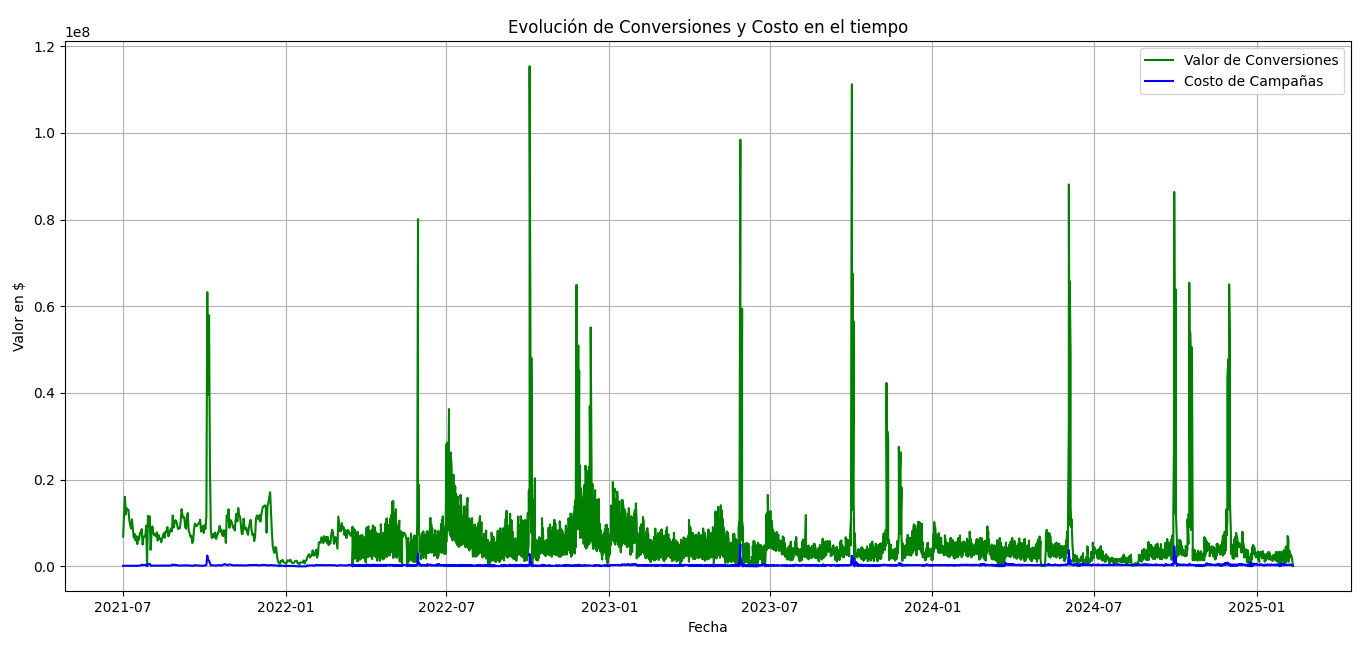

In [4]:
from IPython.display import Image, display

display(Image(filename='Figure_1.png'))

<style>
    .justificado {
        text-align: justify;
        font-size: 15px;
        line-height: 1.8;
    }
</style>

<div class="justificado">

Este gráfico de series temporales permite visualizar la evolución diaria tanto del valor de conversiones como del costo invertido en campañas desde julio de 2021 hasta febrero de 2025.

✔ El eje X abarca desde julio de 2021 hasta enero de 2025.

✔ La línea verde representa el valor de conversiones, que presenta picos muy pronunciados, especialmente en fechas como: noviembre 2021, noviembre 2022, noviembre 2023 y noviembre 2024, coincidiendo con eventos como Black Friday y Cyber Monday.

✔ También hay un pico extremo en octubre de 2022, superando los 115 millones de CLP en un solo día, lo que puede sugerir una campaña masiva o una atribución anómala.

En contraste, la línea azul del costo de campañas permanece mucho más estable y baja, rara vez superando los 3 millones de CLP diarios.

Hay eventos puntuales donde el valor de conversiones crece exponencialmente sin un aumento proporcional del costo. Este fenómeno indica una alta eficiencia en el retorno, especialmente en campañas alrededor de noviembre. Es recomendable reforzar la inversión durante esos eventos clave, validando que sean atribuibles a campañas efectivas.

</div>

# **4. Feature Engineering - Caracterizacion de variables derivadas implementadas**

<style>
    .justificado {
        text-align: justify;
        font-size: 15px;
        line-height: 1.8;
    }
</style>

<div class="justificado">

**¿Por que estas variables?**

<strong>CTR:</strong> ayuda a medir el engagement con los anuncios.<br>
<strong>CPC:</strong> te da un control sobre el costo de adquisición.<br>
<strong>ROAS:</strong> es clave para optimizar inversión: cuánto gano por cada peso gastado.<br>
<strong>es_evento:</strong> permite al modelo identificar patrones de comportamiento especiales.


</div>

In [5]:
## 
df['ctr_calc'] = df['clics'] / df['impresiones']
df['cpc_calc'] = df['costo'] / df['clics']
df['roas'] = df['valor_conversiones'] / df['costo']
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df['es_evento'] = np.where(df['evento'] != 'Ninguno', 1, 0)
print("\nVariables generadas en DF - Validation:")
print(df[['fecha', 
          'costo', 
          'clics', 
          'valor_conversiones', 
          'ctr_calc', 'cpc_calc', 
          'roas', 
          'es_evento']].head())


Variables generadas en DF - Validation:
       fecha     costo  clics  valor_conversiones  ctr_calc   cpc_calc  \
0 2021-07-01  148186.0   2308        6.836939e+06  0.364325  64.205373   
1 2021-07-02  142734.0   2872        1.193089e+07  0.445064  49.698468   
2 2021-07-03  142360.0   4087        1.604242e+07  0.521567  34.832395   
3 2021-07-04  142417.0   3691        1.198394e+07  0.488809  38.584936   
4 2021-07-05  142501.0   4970        1.339342e+07  0.503240  28.672233   

         roas  es_evento  
0   46.137548          0  
1   83.588313          0  
2  112.689082          0  
3   84.146856          0  
4   93.988279          0  


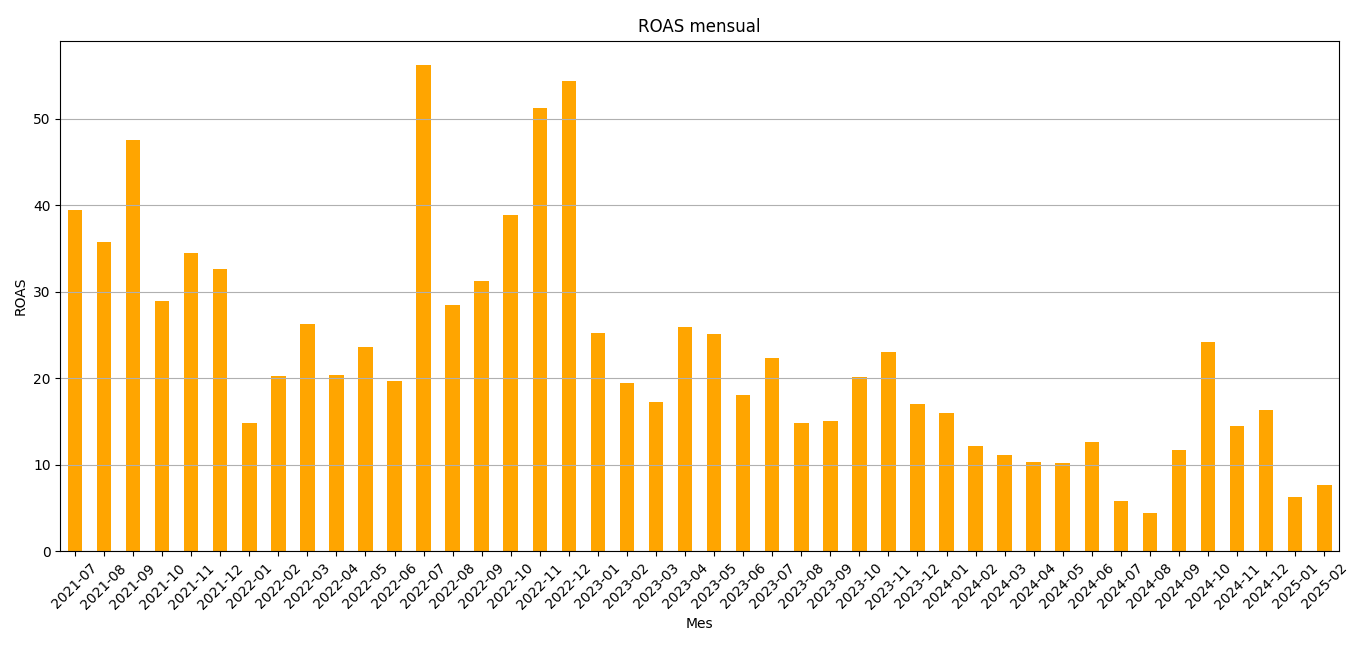

In [6]:
from IPython.display import Image, display

display(Image(filename='Figure_2.png'))

<style>
    .justificado {
        text-align: justify;
        font-size: 15px;
        line-height: 1.8;
    }
</style>

<div class="justificado">

Este gráfico de barras muestra el **ROAS** agregado por mes, lo cual permite observar las fluctuaciones en el desempeño de la inversión publicitaria a lo largo del tiempo.

✔ El eje X muestra el **ROAS** mes a mes desde julio 2021 hasta enero 2025.

✔ Se observan valores inusualmente altos como: julio 2021 y noviembre 2022, donde el **ROAS** mensual supera las 50 unidades, indicando que por cada peso invertido se obtuvieron más de 50 pesos en conversiones.

✔ A partir de mediados de 2023, se evidencia una tendencia descendente clara, con **ROAS** estabilizándose entorno a valores entre 5 y 15 pesos. Octubre 2024 muestra un leve repunte **(ROAS > 20)**, probablemente vinculado al evento Cyber Monday 2024.

Aunque existen meses de alto rendimiento, el ROAS presenta una caída progresiva desde 2023. Esto puede reflejar fatiga publicitaria, aumento de competencia o pérdida de efectividad de las campañas. Se recomienda revisar la estrategia creativa y segmentación para revertir esta tendencia.

</div>

## **5. Modelos de Machine Learning y evaluacion de ajuste**

<style>
    .justificado {
        text-align: justify;
        font-size: 15px;
        line-height: 1.8;
    }
</style>

<div class="justificado">

Se entrenaron cuatro modelos para predecir el valor de conversiones en febrero 2025:

- 🔹 **Regresión Lineal**
- 🌲 **Random Forest Regressor**
- 📈 **XGBoost Regressor**
- 🧮 **SARIMAX** (para modelado temporal más robusto)

Se usaron variables como costo, clics, CTR, CPC y presencia de evento(Variable binaria).

Los modelos fueron evaluados utilizando MAE, RMSE y R², exceptuando el modelo SARIMAX.

</div>

---

*Corrida de los modelos (Regresion lineal, Random Forest & XGBoost)*

```
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error , root_mean_squared_error , r2_score

## Funcion de evaluacion para los modelos

def evaluar_modelo(nombre, y_true, y_pred):
    print(f"\n--- {nombre} ---")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):,.2f}")
    print(f"RMSE: {root_mean_squared_error(y_true, y_pred):,.2f}")
    print(f"R2 Score: {r2_score(y_true, y_pred):.4f}")
    
## REGRESION LINEAL

modelo_lr = LinearRegression()
modelo_lr.fit(x_train, y_train)
pred_lr = modelo_lr.predict(x_test)
evaluar_modelo("Regresion lineal", y_test, pred_lr)

## MODELO RANDOM FOREST

modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(x_train, y_train)
pred_rf = modelo_rf.predict(x_test)
evaluar_modelo("Random Forest", y_test, pred_rf)

## MODELO XGBOOST

modelo_xgb = XGBRegressor(n_estimators = 100 , random_state = 42)
modelo_xgb.fit(x_train, y_train)
pred_xgb = modelo_xgb.predict(x_test)
evaluar_modelo("XGBoost", y_test, pred_xgb)

## **6. Comparación de Modelos**

<style>
    .justificado {
        text-align: justify;
        font-size: 15px;
        line-height: 1.8;
    }
</style>

<div class="justificado">

A continuación se presentan los resultados de los modelos aplicados al conjunto de test de febrero 2025:

<center>

| Modelo           | MAE   | RMSE  | R² Score |
|------------------|-------|-------|----------|
| Regresión Lineal | 8.71  | 10.17 | -3.08    |
| Random Forest    | 3.16  | 4.40  |  0.23    |
| XGBoost          | 3.75  | 4.47  |  0.21    |
| **SARIMAX**      | —     | —     | —        |

</center>

Análisis del rendimiento de los modelos evaluados:

La regresión lineal muestra un coeficiente de determinación (R² = **-3.08**), lo que sugiere que el modelo no logra capturar la variabilidad presente en los datos y, de hecho, su desempeño es inferior al de una estimación basada únicamente en la media. Este resultado indica que la relación entre las variables predictoras y la variable objetivo es altamente no lineal o que existen dependencias temporales que la regresión lineal no puede modelar de manera efectiva.

En contraste, los modelos Random Forest (R² = **0.2350**) y XGBoost (R² = **0.2116**) ofrecen una mejora significativa en el ajuste, capturando de manera más efectiva la complejidad de los datos mediante técnicas de ensamblado y árboles de decisión. A pesar de la mejora en el desempeño respecto a la regresión lineal, los valores de R² aún reflejan una capacidad limitada para realizar predicciones precisas, lo que sugiere que el problema podría beneficiarse de un enfoque basado en series temporales, en lugar de modelos estáticos de regresión.

Los coeficientes **MAE** y **RMSE** son menores para los modelos de ensamblado en comparación con la regresión lineal, lo que confirma una mejor capacidad de ajuste, aunque sin capturar de manera óptima la dinámica temporal subyacente de los datos de campaña.

Dado que el comportamiento de la variable objetivo está influenciado por patrones temporales, se considera más adecuado un enfoque basado en series temporales que puedan incorporar tendencias, estacionalidad y efectos autoregresivos. **SARIMAX** es una opción robusta que permite modelar la dependencia temporal en los datos, integrando tanto componentes de tendencia como posibles efectos exógenos. Con esta transición, se espera una mejora en la precisión de las estimaciones y una mayor confiabilidad en la recomendación de inversión para febrero de 2025.

> ⚠️ **SARIMAX** fue evaluado por su capacidad de predicción directa en el tiempo, no en métricas de test tradicionales. Se considera el modelo más estable al incorporar componentes estacionales.

</div>

---

## **7. Predicción con SARIMAX**

<style>
    .justificado {
        text-align: justify;
        font-size: 15px;
        line-height: 1.8;
    }
</style>

<div class="justificado">

El modelo **SARIMAX** fue entrenado usando una estacionalidad semanal, lo que permite capturar ciclos frecuentes como el comportamiento entre días laborales y fines de semana.

Con el siguiente codigo logramos obtener los valores: Total estimado de conversiones, Inversión y ROAS predicho por **SARIMAX** para febrero de 2025:

</div>

---

In [7]:
## Implementacion de modelo SARIMAX robusto con multivariables

df['fecha'] = pd.to_datetime(df['fecha'])  # por si acaso
df = df.set_index('fecha')
df = df.sort_index()
exog_cols = ['costo', 'clics', 'impresiones', 'ctr_calc', 'cpc_calc', 'es_evento']

# Entrenamiento (hasta enero 2025)
y_train = df['valor_conversiones']['2021-07-01':'2025-01-31']
X_train = df[exog_cols]['2021-07-01':'2025-01-31']

## Prediccion febrero 2025
X_forecast = df[exog_cols]['2025-02-01':'2025-02-28']

# Modelo SARIMAX manual con estacionalidad semanal
modelo_sarimax = SARIMAX(
    y_train,
    exog=X_train,
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 7),
    enforce_stationarity=False,
    enforce_invertibility=False
)

modelo_fit = modelo_sarimax.fit(disp=False)

# Predecir los próximos N pasos a partir del final de y_train
n_steps = len(X_forecast)
pred_sarimax = modelo_fit.forecast(steps=n_steps, exog=X_forecast)

## Evaluar resultados

inversion_feb = df.loc['2025-02-01':'2025-02-28', 'costo'].sum()
valor_estimado = pred_sarimax.sum()
roas = valor_estimado / inversion_feb if inversion_feb > 0 else 0

print(f"\nTotal estimado de conversiones (SARIMAX): ${valor_estimado:,.2f}")
print(f"Inversión en febrero 2025: ${inversion_feb:,.2f}")
print(f"ROAS estimado (SARIMAX): {roas:.2f}")


Total estimado de conversiones (SARIMAX): $29,923,925.55
Inversión en febrero 2025: $7,360,299.36
ROAS estimado (SARIMAX): 4.07


<style>
    .justificado {
        text-align: justify;
        font-size: 15px;
        line-height: 1.8;
    }
</style>

<div class="justificado">

El modelo **SARIMAX**, al incorporar componentes de tendencia, estacionalidad semanal y factores exógenos (como costo, clics, CTR, CPC, eventos), ha estimado que por cada peso chileno invertido en publicidad durante febrero de 2025, se generarán aproximadamente 4.07 pesos en conversiones.

Este valor se calcula con la fórmula:

</div>

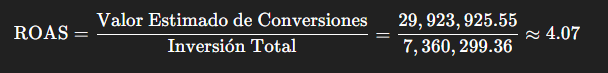

In [8]:
from IPython.display import Image, display

display(Image(filename='Figure_4.png'))

<style>
    .justificado {
        text-align: justify;
        font-size: 15px;
        line-height: 1.8;
    }
</style>

<div class="justificado"> 

✔ Un ROAS de 4.07 indica que la inversión publicitaria en Search genera un retorno altamente positivo, lo que sugiere que por cada peso invertido, se recuperan 3.07 pesos adicionales en valor de conversiones.

✔ Desde una perspectiva de eficiencia financiera, cualquier ROAS mayor a 1 implica que la campaña está generando más ingresos que costos. En este caso, un ROAS > 4 implica un nivel de eficiencia considerable.

⚠️ El valor de ROAS proyectado por SARIMAX (4.07) indica que la campaña Search tiene un buen desempeño proyectado para febrero 2025, pero se deben incorporar mecanismos de ajuste y validación adicionales para tomar decisiones de inversión basadas en predicciones más robustas.

</div>

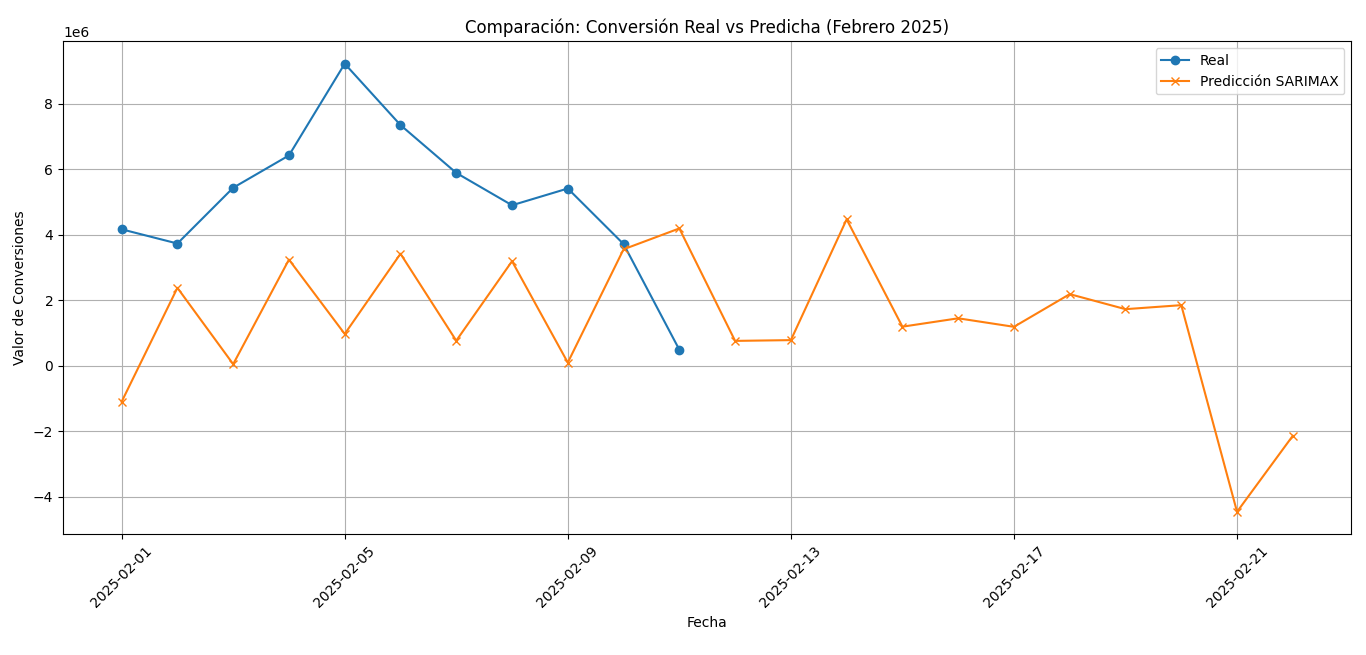

In [9]:
from IPython.display import Image, display

display(Image(filename='Figure_3.png'))

<style>
    .justificado {
        text-align: justify;
        font-size: 15px;
        line-height: 1.8;
    }
</style>

<div class="justificado">

Este gráfico compara los valores reales de conversiones durante febrero 2025 frente a las predicciones generadas por el modelo **SARIMAX**.

✔ El eje X cubre el periodo del 1 al 22 de febrero de 2025.

✔ La línea azul representa los valores reales de conversiones, con picos notables: 5 de febrero, con más de 9 millones CLP, 6 y 7 de febrero, con conversiones entre 7 y 6 millones CLP.

✔ La línea naranja muestra la predicción del modelo **SARIMAX**, que si bien sigue cierta estacionalidad semanal, subestima claramente los picos reales.

El modelo **SARIMAX** tiene la capacidad de capturar estacionalidad semanal, pero sus predicciones aún presentan limitaciones. Para nuestro caso en especifico es recomendable abordar metodologias de imputacion y tratamiento avanzadas que tomaran un poco mas de tiempo. A modo general podriamos abordar ajustes sobre el modelo al implementar:

✔ Ajustes automáticos de hiperparámetros (p. ej., con auto_arima() de pmdarima).

✔ Incorporar más variables exógenas como tipo de producto, canal (Search, Display), día de la semana, presupuesto asignado por campaña, entre otras.

✔ Detección de outliers y suavizado para prevenir que picos extremos desbalanceen el ajuste.

✔ Explorar modelos complementarios como Prophet, LSTM (Long Short-Term Memory) para series temporales con estructuras más complejas, o incluso un modelo híbrido (SARIMAX + XGBoost para corrección de errores).

</div>

------

## **8. Recomendaciónes y conclusiones de Inversión (Febrero 2025)**

<style>
    .justificado {
        text-align: justify;
        font-size: 15px;
        line-height: 1.8;
    }
</style>

<div class="justificado">

Con base en los análisis realizados y utilizando exclusivamente la información disponible hasta el 31 de enero de 2025, se propone la siguiente recomendación de inversión para el mes de **febrero de 2025**:

### Resumen de Resultados Relevantes
- **Modelos evaluados**: Regresión Lineal, Random Forest, XGBoost y SARIMAX.
- **Mejor desempeño agregado**: **SARIMAX**, al capturar patrones temporales y estacionales junto a variables exógenas.
- **Proyección estimada de conversiones (SARIMAX)**: $29,923,925.55  
- **Inversión registrada en febrero 2025**: $7,360,299.36  
- **ROAS proyectado por SARIMAX**: **4.07**

### Análisis e Interpretación

El valor estimado de ROAS (4.07) indica que, **por cada peso invertido en campañas de Google Ads tipo Search, se espera recuperar más de 4 veces el valor en conversiones**. Este nivel de retorno es altamente positivo y justifica la continuidad —e incluso la optimización— de las estrategias actuales de inversión.

A pesar de ciertas imprecisiones del modelo en días específicos, los resultados mensuales muestran consistencia. El modelo SARIMAX integra variables como **costos, clics, CTR, CPC y eventos**, lo que refuerza su capacidad para proyectar con mayor robustez frente a modelos puramente estáticos o sin componentes estacionales.

### Recomendación Concreta

>**Se recomienda mantener o incluso aumentar progresivamente la inversión en campañas Search durante febrero 2025**, siempre que se acompañe de:
> - Monitoreo diario de performance con ajustes ágiles.
> - Refuerzo en fechas especiales o eventos próximos.
> - Evaluación complementaria con intervalos de predicción e indicadores de incertidumbre.

### Advertencia Técnica

**es clave complementar estas proyecciones con modelos adicionales y dashboards en tiempo real**. Así se minimiza el riesgo operativo y se ajusta la inversión según el comportamiento real del mercado durante el mes.

</div>